<a href="https://colab.research.google.com/github/Himanshu-Tagde/ABC/blob/main/Shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/shapes_dataset.zip

Archive:  /content/shapes_dataset.zip
   creating: shapes_dataset/
   creating: shapes_dataset/circle/
  inflating: shapes_dataset/circle/download (1).jpg  
  inflating: shapes_dataset/circle/download (1).png  
  inflating: shapes_dataset/circle/download (10).png  
  inflating: shapes_dataset/circle/download (2).jpg  
  inflating: shapes_dataset/circle/download (2).png  
  inflating: shapes_dataset/circle/download (3).jpg  
  inflating: shapes_dataset/circle/download (3).png  
  inflating: shapes_dataset/circle/download (4).png  
  inflating: shapes_dataset/circle/download (5).png  
  inflating: shapes_dataset/circle/download (6).png  
  inflating: shapes_dataset/circle/download (7).png  
  inflating: shapes_dataset/circle/download (8).png  
  inflating: shapes_dataset/circle/download (9).png  
  inflating: shapes_dataset/circle/download.jpg  
  inflating: shapes_dataset/circle/download.png  
  inflating: shapes_dataset/circle/images (1).jpg  
  inflating: shapes_dataset/circle/images.

In [ ]:
# Install necessary libraries
!pip install tensorflow matplotlib numpy ipywidgets

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import os
from random import choice
from google.colab import drive
import ipywidgets as widgets
from IPython.display import display


dataset_dir = '/content/shapes_dataset'

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')


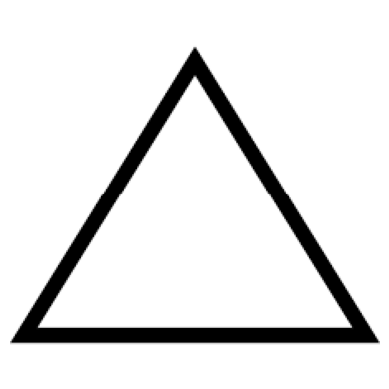

Guess the shape!


Correct! The shape is: triangle
Current score: 1


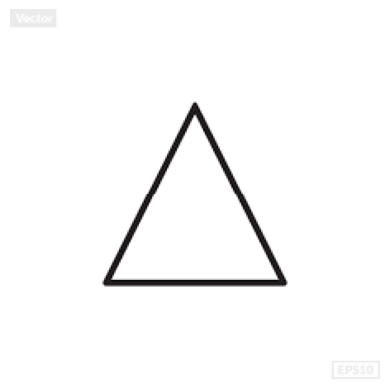

Guess the shape!


Correct! The shape is: triangle
Current score: 2


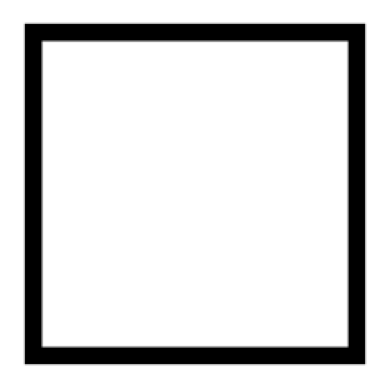

Guess the shape!


Correct! The shape is: square
Current score: 3


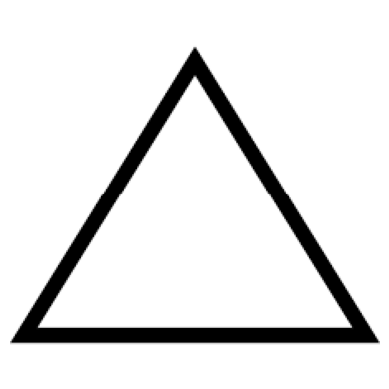

Guess the shape!


Correct! The shape is: triangle
Current score: 4


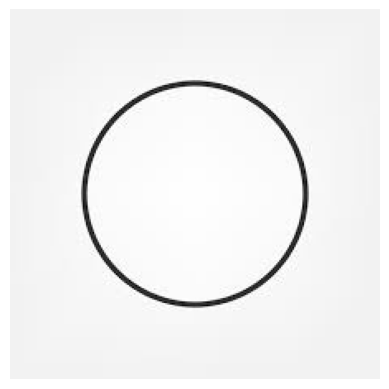

Guess the shape!


Correct! The shape is: circle
Current score: 5


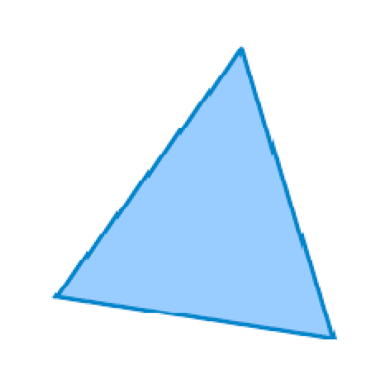

Guess the shape!


In [34]:

# Initialize score
score = 0


def load_random_image(dataset_dir):
    # Get all image file paths (across subfolders)
    shapes_folders = ['circle', 'triangle', 'square']
    folder = choice(shapes_folders)
    shape_folder_path = os.path.join(dataset_dir, folder)


    image_files = [f for f in os.listdir(shape_folder_path) if f.endswith('.jpg') or f.endswith('.png')]
    if len(image_files) == 0:
        raise ValueError(f"No images found in the {folder} folder.")

    # Pick a random image file
    image_file = choice(image_files)
    image_path = os.path.join(shape_folder_path, image_file)

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # MobileNetV2 expects 224x224 input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    return img, img_array, image_file, folder

# Function to predict the shape
def predict_shape(model, img_array):
    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=3)[0]
    return decoded_preds

# Function to handle user interaction and update score
def handle_button_click(option, actual_shape):
    global score

    if option == actual_shape:
        score += 1
        print(f"Correct! The shape is: {actual_shape}")
    else:
        print(f"Wrong! The shape was: {actual_shape}")

    print(f"Current score: {score}")

    # Reload a new image for the next question
    display_shape_question()

# Function to display the shape question with clickable options
def display_shape_question():
    img, img_array, image_file, actual_shape = load_random_image(dataset_dir)

    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(f"Guess the shape!")

    # Create clickable buttons for options
    options = ['circle', 'triangle', 'square']
    buttons = []

    for option in options:
        button = widgets.Button(description=option.capitalize())
        button.on_click(lambda b, option=option: handle_button_click(option, actual_shape))
        buttons.append(button)

    # Display the buttons
    display(widgets.HBox(buttons))

# Main execution loop
display_shape_question()
